In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import Operators as op
import SensingMatrix as sm
import Measurements as me
from SetUpImage import setUpImage
from Displays import phase_retrie_plots
import solve

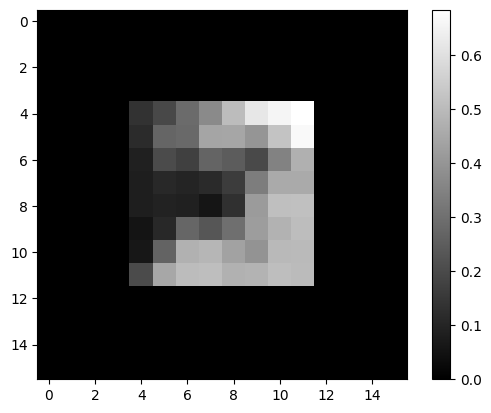

In [3]:
Nx, Ny = 16,16
n = Nx * Ny
true_images, mask = setUpImage(Nx, Ny) 

#map.f(x_true) < 1e-5

plt.imshow(true_images[2].real, cmap='gray')
plt.colorbar()

In [4]:
x_true = true_images[1]
x_true_vect = x_true.reshape(Nx * Ny, )

#print("x_true_vect", x_true_vect)
#x = (1 + 2j)*np.ones(x_true_vect.shape)

#noise_lvl = 0.e-4
A = sm.FourierMatrix(Nx,Ny) #sm.iid_stdd_Gauss(Nx,Ny)
#print("A.Matrix", A.Matrix)
#meas, noise = me.gauss_noisy_meas(x_true_vect, noise_lvl , A)()
#map = op.operators(algo = 'complex mirror', meas = meas, A = A)
#map.f( x)
#print(map.psi(2 * x), map.psi(1 * x), map.breg_psi(2 * x, x))

iteration k 0
a 2.6499474066234163e-05
t 0.9999735026323768
a 1.4793656284500413e-05
t 0.9999852070002333
a 1.170581778173375e-05
t 0.9999882945932776
a 2.6665292320260628e-05
t 0.9999733368405659
a 1.4834302322765903e-05
t 0.9999851663578074
a 1.1830989997494724e-05
t 0.9999881694298997
a 2.9903888182091823e-05
t 0.9999700987942247
a 1.5502550810690873e-05
t 0.9999844981701318
a 1.440133737140095e-05
t 0.9999855992847884
a 0.0002485908996700348
t 0.9997515943084985
a 4.951296080421974e-05
t 0.9999504943923393
a 0.00019907793886581504
t 0.9998010408626197
a 0.028767471042544818
t 0.9734625363812328
a 0.004200403532660374
t 0.995851654096183
a 0.024567067509884438
t 0.9770834966348078
a 4.0998216174798445
t 0.49692363296329833
a 0.592969344273403
t 0.7499205499875056
a 3.5068522732064435
t 0.5165783565824802
a 589.9036435748113
t 0.11449924401087239
a 85.2681851916618
t 0.21002697649707702
a 504.6354583831495
t 0.12034945758267429
a 84940.5183038749
t 0.022576466044575635
a 12277.209127

c:\Users\sefojere\AppData\Local\miniconda3\envs\firstenv\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


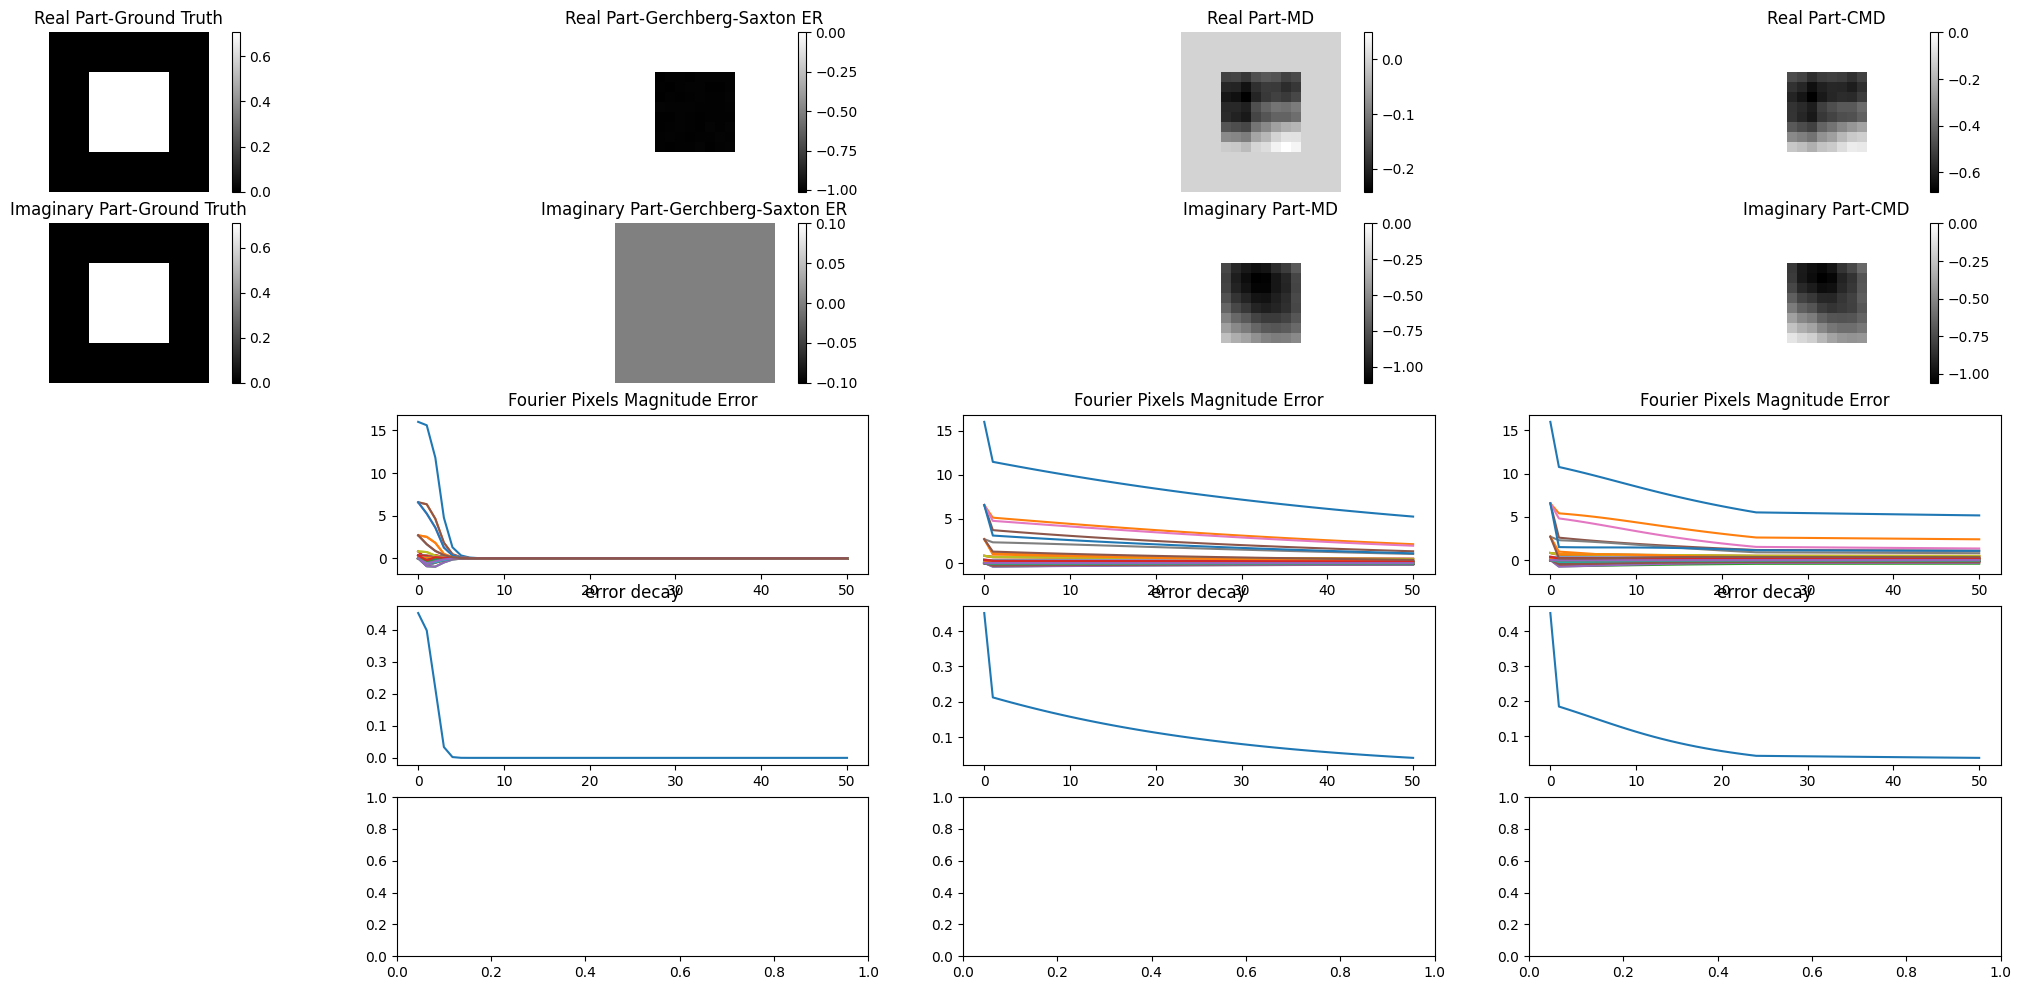

In [5]:
idx = [0]#np.arange(len(true_images)) #[0, 1] # np.arange(1) 
Algos = ['FIENUP', 'real mirror', 'complex mirror' ]

#fig = plt.figure(figsize=(28,12))
for i in idx:
    X_sols = []
    x_true = true_images[i]
    x_true_vect = x_true.reshape(Nx * Ny, )
    maxiter = 50
    kappa  = 0.9
    xi = 12
    noise_lvl = 1.e-4
    meas, noise = me.gauss_noisy_meas(x_true_vect, noise_lvl , A)()
    L = 1 * op.smoothnessPara_L(A.Matrix, noise)
    #print("meas", meas)
    x0 = op.initialise(n, meas, A.Matrix, type ='Gaussian', real = 1, imag = 1, x_true_vect = x_true_vect, mask = mask, noise_lvl = noise_lvl**(0.5) )
    for Algo in Algos:
        map = op.operators(algo = Algo, meas = meas, A = A) 
        x_sols = solve.phase_retrieval(L, kappa, xi, Algo, map, mask, n, A.Matrix, meas, maxiter, x0 )
        X_sols.append(x_sols)
    phase_retrie_plots(i, true_images, X_sols, map, A, meas, maxiter)